## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company wants features to be considered for creating any business plan.

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1 : Read Data and understand the correlation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('day.csv')
data.shape

(730, 16)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


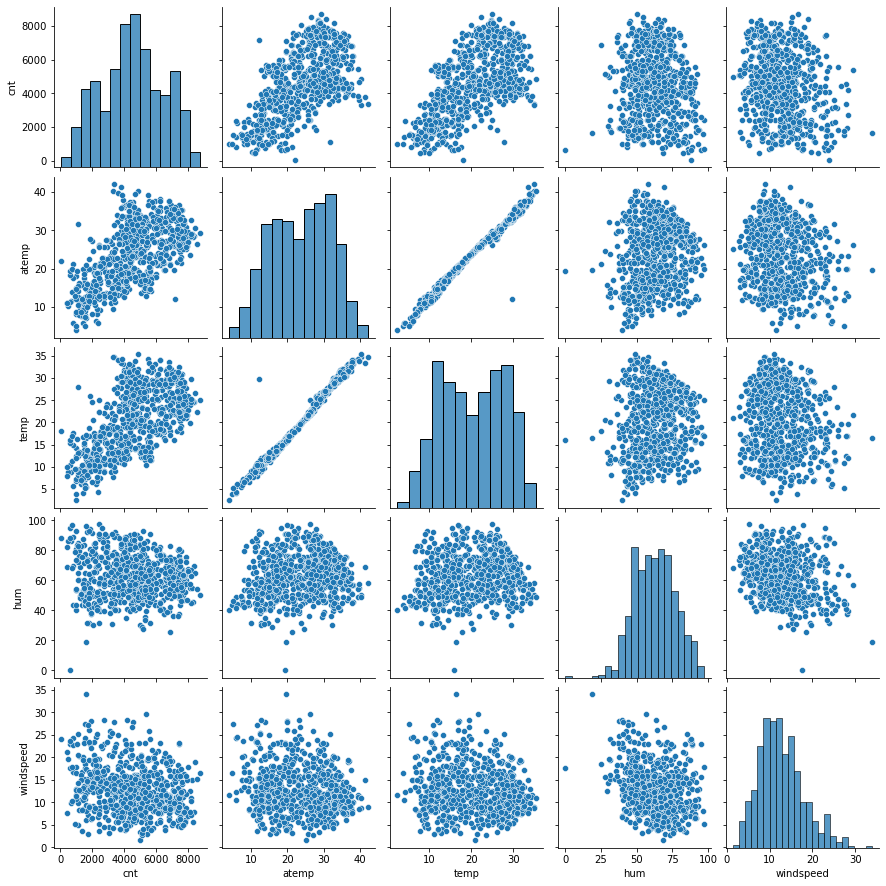

In [6]:
#Plot for checking the linearity with cnt variable.
sns.pairplot(data,vars=['cnt','atemp','temp','hum','windspeed'])
plt.show()

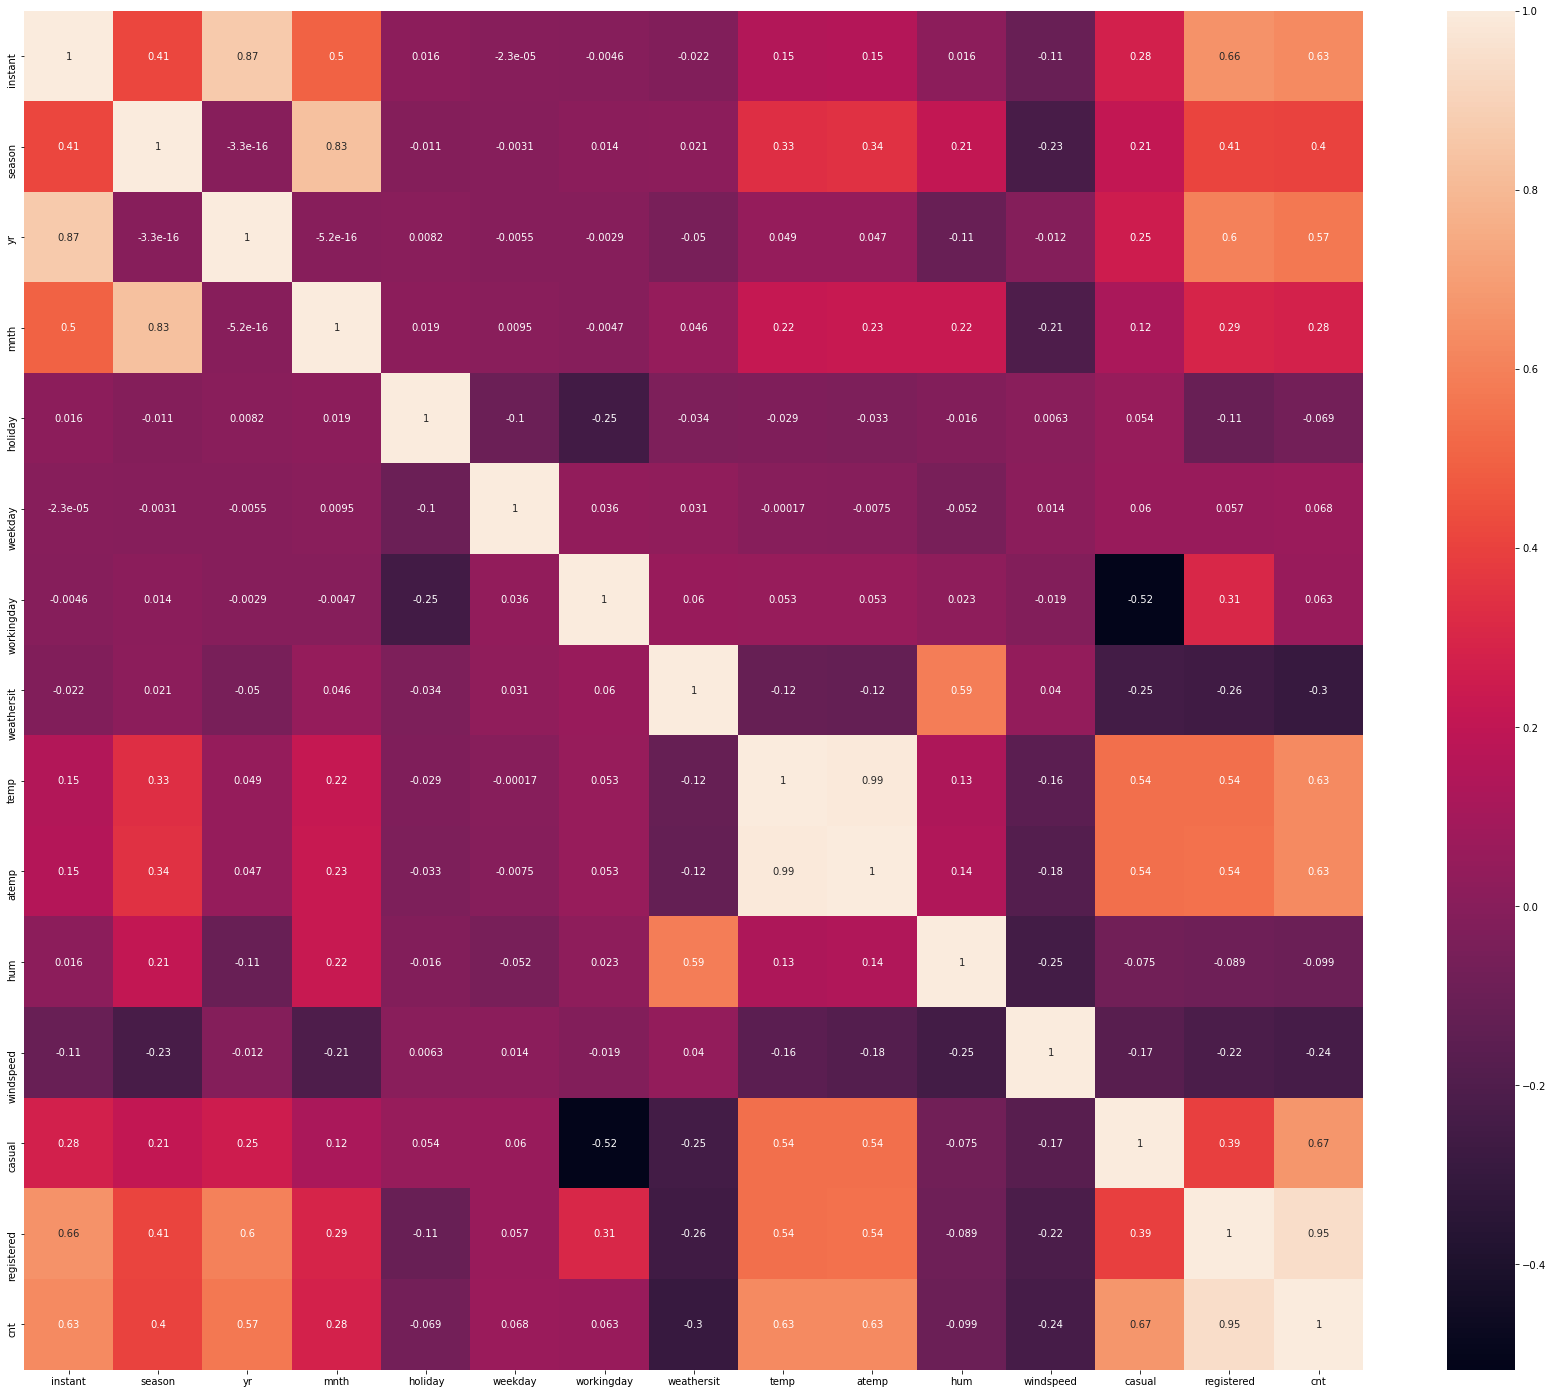

In [7]:
plt.figure(figsize = (30, 25))
sns.heatmap(data.corr(), annot = True)
plt.show()

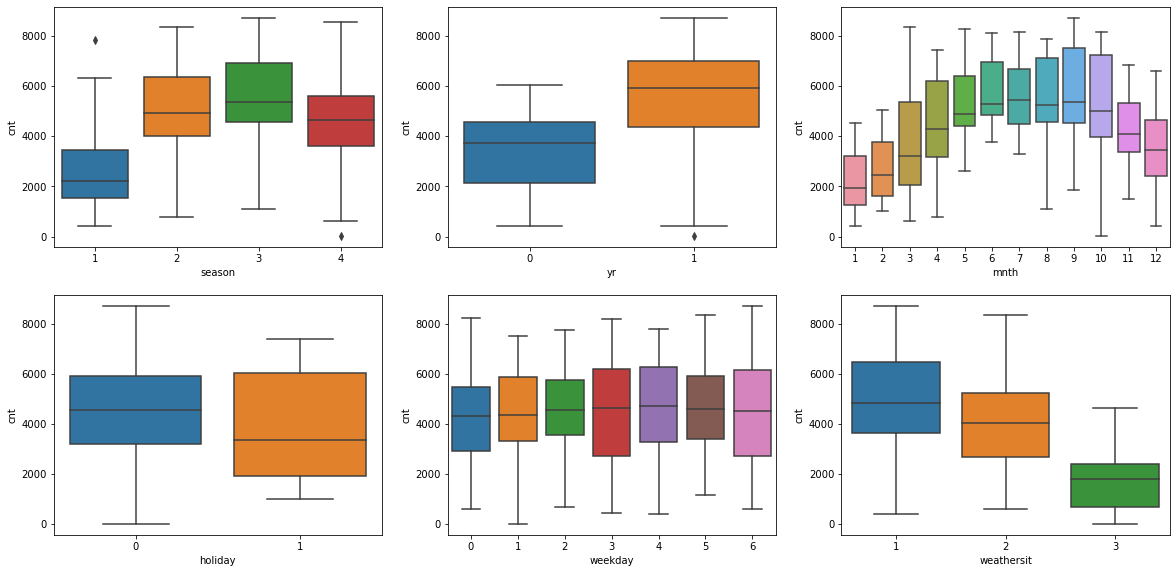

In [8]:
# Box Plots for categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.show()

In [9]:
# Get dummy for weekend,season,month and weather
data = pd.get_dummies(data, columns=['weekday','season','mnth','weathersit'], drop_first=True)

In [10]:
# droppping instant(serial number) ,casual(count of casual customer) and registered column(register customer count)
data.drop(['instant','casual','registered','dteday'],axis=1, inplace=True)

In [11]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   weekday_1     510 non-null    uint8  
 9   weekday_2     510 non-null    uint8  
 10  weekday_3     510 non-null    uint8  
 11  weekday_4     510 non-null    uint8  
 12  weekday_5     510 non-null    uint8  
 13  weekday_6     510 non-null    uint8  
 14  season_2      510 non-null    uint8  
 15  season_3      510 non-null    uint8  
 16  season_4      510 non-null    uint8  
 17  mnth_2        510 non-null    uint8  
 18  mnth_3        510 non-null   

In [12]:
scaler = MinMaxScaler()
data_train[['temp', 'hum', 'windspeed','cnt']] = scaler.fit_transform(data_train[['temp', 'hum', 'windspeed','cnt']])

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    float64
 8   weekday_1     510 non-null    uint8  
 9   weekday_2     510 non-null    uint8  
 10  weekday_3     510 non-null    uint8  
 11  weekday_4     510 non-null    uint8  
 12  weekday_5     510 non-null    uint8  
 13  weekday_6     510 non-null    uint8  
 14  season_2      510 non-null    uint8  
 15  season_3      510 non-null    uint8  
 16  season_4      510 non-null    uint8  
 17  mnth_2        510 non-null    uint8  
 18  mnth_3        510 non-null   

In [14]:
y_train = data_train.pop('cnt')
X_train = data_train

In [15]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [16]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 13),
 ('weekday_4', False, 14),
 ('weekday_5', False, 12),
 ('weekday_6', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [17]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'weekday_6',
       'season_2', 'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [18]:
X_train.columns[~rfe.support_]

Index(['atemp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12'],
      dtype='object')

In [19]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [20]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [21]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [22]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.89e-191
Time:                        15:44:42   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

In [23]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.06
4,hum,17.47
8,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
7,season_2,3.44
9,season_4,2.88
13,weathersit_2,2.15
0,yr,2.04
6,weekday_6,1.90


#### Remove the high p-value and high VIF values one by one until we reach VIF < 5 for all the variable selected

In [24]:
X_train_new = X_train_rfe.drop(['season_3'], axis = 1)

In [25]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [26]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [27]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.24e-192
Time:                        15:44:43   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [28]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
8,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
6,weekday_6,1.90
7,season_2,1.83
11,mnth_10,1.62


In [29]:
## Drop Weekday 3 as it shows high p value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

In [30]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [31]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [32]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.86e-192
Time:                        15:44:43   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1848      0.028      6.496   

In [33]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.09
2,temp,10.01
1,workingday,4.55
4,windspeed,3.76
7,season_4,2.27
11,weathersit_2,2.13
0,yr,2.03
6,season_2,1.82
5,weekday_6,1.79
10,mnth_10,1.61


In [34]:
## Drop weekday 4 has it has P valueand rebuild the model
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [35]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [36]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [37]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.86e-189
Time:                        15:44:44   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610   

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
6,season_4,1.99
5,season_2,1.82
4,weekday_6,1.70
9,mnth_10,1.61
7,mnth_8,1.59
10,weathersit_2,1.54


In [39]:
## Drop weekday2 as it hae high p-value and rebuild the model
X_train_new = X_train_new.drop(['mnth_10'], axis = 1)

In [40]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [41]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [42]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.00e-189
Time:                        15:44:44   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0813      0.019      4.384   

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
5,season_2,1.81
4,weekday_6,1.69
7,mnth_8,1.58
9,weathersit_2,1.54
6,season_4,1.51
8,mnth_9,1.30


In [44]:
## Drop weekday 1 as it hae high p-value and rebuild the model
X_train_new = X_train_new.drop(['mnth_8'], axis = 1)

In [45]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [46]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.47e-188
Time:                        15:44:45   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.019      4.051   

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
4,weekday_6,1.69
5,season_2,1.57
8,weathersit_2,1.53
6,season_4,1.40
7,mnth_9,1.20
9,weathersit_3,1.08


## Residual Analysis of the train data

In [49]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

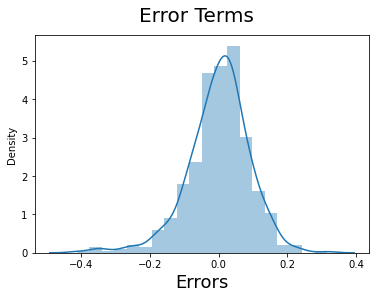

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

## Making Predictions

In [51]:
data_test[['temp','hum','windspeed','cnt']] = scaler.transform(data_test[['temp', 'hum', 'windspeed','cnt']])

In [52]:
y_test = data_test.pop('cnt')
X_test = data_test

In [53]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_new.drop(['const'],axis=1).columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [54]:
# Making predictions
y_test_pred = lm.predict(X_test)# Plotting y_test and y_pred to understand the spread. 

### Evaluate Model 

In [55]:
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.7955844377237248
